In [65]:
import numpy as np
import pandas as pd
from dside import DSI
import matplotlib.pyplot as plt
import GPy
from smt.sampling_methods import LHS
from kernel_opt_fun import *

In [66]:
# step 1. Mathematical problem formulation
# Define the objective function which can be any 7D function
def f(X):
    #SR7 function (speed reducer)
    A = 3.3333*X[:,2]**2 + 14.9334*X[:,2] - 43.0934
    B = X[:,5]**2 + X[:,6]**2
    C = X[:,5]**3 + X[:,6]**3
    D = X[:,3]*X[:,5]**2 + X[:,4]*X[:,6]**2

    return 0.7854*X[:,0]*X[:,1]**2*A - 1.508*X[:,0]*B + 7.477*C + 0.7854*D

#step 2. Surrogate model training
#Generate LHS training samples
xlimits = np.array([
    [2.6, 3.6],
    [0.7, 0.8], 
    [17, 28],
    [7.3, 8.3],
    [7.3, 8.3], 
    [2.9, 3.9],
    [5, 5.5]
])

sampling = LHS(xlimits=xlimits, criterion='ese')

n = 875 #user defined

x_LHS = sampling(n)



In [ ]:

# Create input X arrays
X1 = x_LHS[:,0]
X2 = x_LHS[:,1]
X3 = x_LHS[:,2]
X4 = x_LHS[:,3]
X5 = x_LHS[:,4]
X6 = x_LHS[:,5]
X7 = x_LHS[:,6]



In [ ]:
X = np.vstack((X1.flatten(), X2.flatten(), X3.flatten(), X4.flatten(), X5.flatten(), X6.flatten(), X7.flatten())).T
Y = f(X).reshape(-1, 1)

# kernel optimisation
best_kernel, best_mea = find_best_kernel(X, Y, input_dim=7)
print("Best kernel:", kernel_to_str(best_kernel))
print("Best MEA:", best_mea)


In [69]:
#gpr training 
model = GPy.models.GPRegression(X, Y, best_kernel)
#hyperparameter optimisation
model.optimize(messages=True)


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s17  0001   1.759062e+03   6.143268e+04 

 C:\Users\lm3223\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


    02s36  0015   2.460281e+02   7.348681e+05 
    03s45  0022   2.574008e+02   3.669505e+06 
    05s55  0035   5.127000e+03   3.307179e+03 
    08s80  0055   5.126997e+03   3.307175e+03 
    09s11  0057   1.711804e+02   1.020387e+04 
Runtime:     09s11
Optimization status: Converged



In [70]:


# Re-generate sample points for plotting (finer grid)
n = 6
X1 = np.linspace(2.6, 3.6, n)
X2 = np.linspace(0.7, 0.8, n)
X3 = np.linspace(17, 28, n)
X4 = np.linspace(7.3, 8.3, n)
X5 = np.linspace(7.3, 8.3, n)
X6 = np.linspace(2.9, 3.9, n)
X7 = np.linspace(5, 5.5, n)

X1, X2, X3, X4, X5, X6, X7 = np.meshgrid(X1, X2, X3, X4, X5, X6, X7)
X = np.vstack((X1.flatten(), X2.flatten(), X3.flatten(), X4.flatten(), X5.flatten(), X6.flatten(), X7.flatten())).T
Y = f(X).reshape(-1, 1)

# Step 4: Predict
X_pred = X
Y_pred, Y_pred_var = model.predict(X_pred)

# Reshape for plotting
Y_pred = Y_pred.reshape(X1.shape)
Y_true = f(X_pred).reshape(X1.shape)


In [ ]:
## uncomment for small y analysis when   MAPE is large
#  import matplotlib.pyplot as plt

# # Plot the distribution of Y_true
# plt.hist(Y, bins=50, edgecolor='black')
# plt.title("Distribution of True Values (Y_true)")
# plt.xlabel("Y_true")
# plt.ylabel("Frequency")
# plt.show()


In [72]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 

MAE = mean_absolute_error(Y, Y_pred.reshape(-1, 1))
MAPE = mean_absolute_percentage_error(Y, Y_pred.reshape(-1, 1))
print(f"MAE = {MAE:.5f}")
#print(f"MAPE = {MAPE*100:.5f}%")


MAE = 0.07562
MAPE = 0.00168%


In [73]:
# Calculate the percentage of small values baaed on Ytrue
threshold = 1e-3
percentsmallY = percentage_small_values(Y, threshold)

print(f"Percentage of small true values (|Y_true| < {threshold}): {percentsmallY:.2f}%")

# Calculate custom MAPE
custom_MAPE = custom_mape(Y, Y_pred.reshape(-1, 1))
print(f"Custom MAPE = {custom_MAPE:.2f}%")

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2score = r2_score(Y, Y_pred.reshape(-1, 1))
MSE = mean_squared_error(Y, Y_pred.reshape(-1, 1))
print(f"R2 = {R2score:.2f}")
print(f"MSE = {MSE:.5f}")

Percentage of small true values (|Y_true| < 0.001): 0.00%
Custom MAPE = 0.00%
R2 = 1.00
MSE = 0.02048


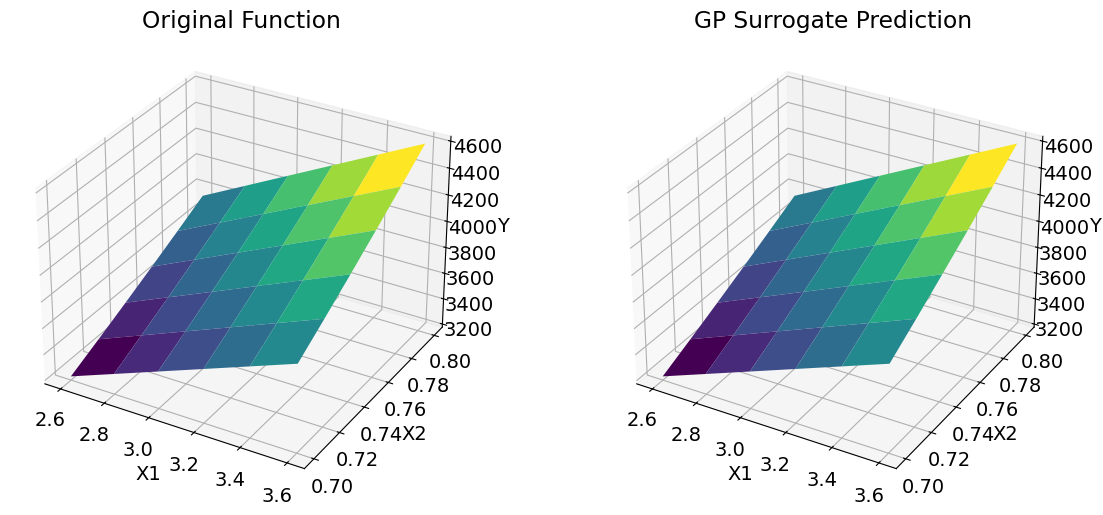

In [74]:
#plot original vs surrogate functions
import numpy as np
import matplotlib.pyplot as plt

#  X1, X2, X3, X4, X5, X6, X7 are all 7-dimensional arrays and Y_true, Y_pred are also 7-dimensional arrays.

# Set the dimensions for each of the variables
n = 5  # Example size for each dimension


# Select fixed slices for X3, X4, X5, X6, and X7
slice_index_X3 = n // 2
slice_index_X4 = n // 2
slice_index_X5 = n // 2
slice_index_X6 = n // 2
slice_index_X7 = n // 2

# Extract slices for visualization
X1_slice = X1[:, :, slice_index_X3, slice_index_X4, slice_index_X5, slice_index_X6, slice_index_X7]
X2_slice = X2[:, :, slice_index_X3, slice_index_X4, slice_index_X5, slice_index_X6, slice_index_X7]
Y_true_slice = Y_true[:, :, slice_index_X3, slice_index_X4, slice_index_X5, slice_index_X6, slice_index_X7]
Y_pred_slice = Y_pred[:, :, slice_index_X3, slice_index_X4, slice_index_X5, slice_index_X6, slice_index_X7]

# Plotting
fig = plt.figure(figsize=(14, 6))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1_slice, X2_slice, Y_true_slice, cmap='viridis')
ax1.set_title('Original Function')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Surrogate model prediction
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1_slice, X2_slice, Y_pred_slice, cmap='viridis')
ax2.set_title('GP Surrogate Prediction')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()


Text(0.5, 0, 'Residuals')

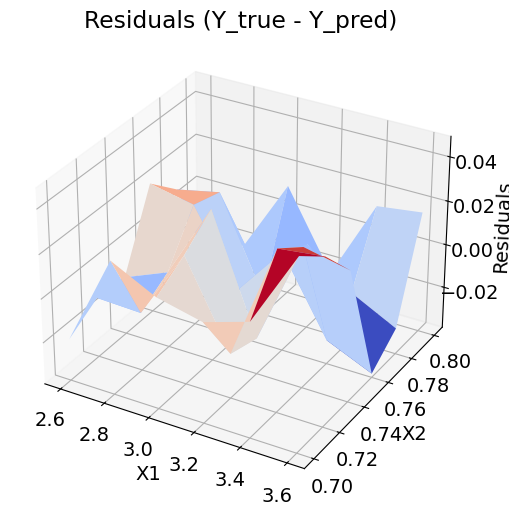

In [75]:
# Calculate residuals
residuals = Y_true_slice - Y_pred_slice

# # Plotting
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1_slice, X2_slice, residuals, cmap='coolwarm')
ax1.set_title('Residuals (Y_true - Y_pred)')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Residuals')


In [76]:
# Flatten the arrays
X1_flat = X1.flatten()
X2_flat = X2.flatten()
X3_flat = X3.flatten()
X4_flat = X4.flatten()
X5_flat = X5.flatten()
X6_flat = X6.flatten()
X7_flat = X7.flatten()

Y_true_flat = Y_true.flatten()
Y_pred_flat = Y_pred.flatten()

# Create a DataFrame
data = {
    'X1': X1_flat,
    'X2': X2_flat,
    'X3': X3_flat,
    'X4': X4_flat,
    'X5': X5_flat,
    'X6': X6_flat,
    'X7': X7_flat,

    'Y_true': Y_true_flat,
    'Y_pred': Y_pred_flat,
}
df = pd.DataFrame(data)

print(df)

         X1   X2    X3   X4   X5   X6   X7       Y_true       Y_pred
0       2.6  0.7  17.0  7.3  7.3  2.9  5.0  2352.343276  2352.361916
1       2.6  0.7  17.0  7.3  7.3  2.9  5.1  2411.380550  2411.335258
2       2.6  0.7  17.0  7.3  7.3  2.9  5.2  2472.742037  2472.676956
3       2.6  0.7  17.0  7.3  7.3  2.9  5.3  2536.472601  2536.405640
4       2.6  0.7  17.0  7.3  7.3  2.9  5.4  2602.617104  2602.617653
...     ...  ...   ...  ...  ...  ...  ...          ...          ...
279931  3.6  0.8  28.0  8.3  8.3  3.9  5.1  6887.891912  6887.919739
279932  3.6  0.8  28.0  8.3  8.3  3.9  5.2  6948.509122  6948.725555
279933  3.6  0.8  28.0  8.3  8.3  3.9  5.3  7011.480956  7011.822418
279934  3.6  0.8  28.0  8.3  8.3  3.9  5.4  7076.852276  7077.421509
279935  3.6  0.8  28.0  8.3  8.3  3.9  5.5  7144.667945  7145.346649

[279936 rows x 9 columns]


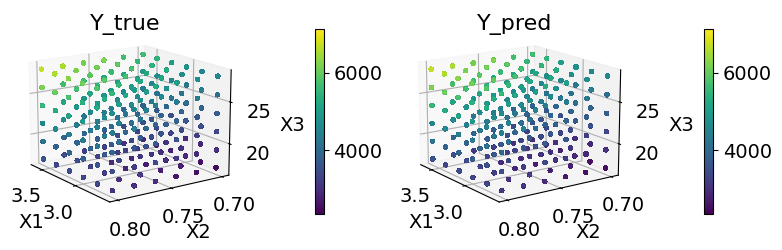

In [78]:
#uncomment for 3D plots y true vs y pred
#3D plots with fixed X4

fs = 14
fig = plt.figure(figsize = (8, 3))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
s1 = ax1.scatter(X1, X2, X3, c = Y_true, marker = '.')
cbar1 = fig.colorbar(s1, ax = ax1, fraction = 0.03, pad = 0.25)
ax1.view_init(15, 145)
ax1.set_title('Y_true', fontsize = fs + 2, y = 0.95)
ax1.set_xlabel('X1', fontsize = fs)
ax1.set_ylabel('X2', fontsize = fs)
ax1.set_zlabel('X3', fontsize = fs)

ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
s2 = ax2.scatter(X1, X2, X3, c = Y_pred, marker = '.')
cbar2 = fig.colorbar(s2, ax = ax2, fraction = 0.03, pad = 0.25)
ax2.view_init(15, 145)
ax2.set_title('Y_pred', fontsize = fs + 2, y = 0.95)
ax2.set_xlabel('X1', fontsize = fs)
ax2.set_ylabel('X2', fontsize = fs)
ax2.set_zlabel('X3', fontsize = fs)


plt.tight_layout()
plt.show()

In [79]:
#GP mathematical model function for slicing later
#step 3. Surrogate model simulation
def RS7(X):
    Y_pred, Y_pred_var = model.predict(X)
    X1 = np.array(X[:,0])
    X2 = np.array(X[:,1])
    X3 = np.array(X[:,2])
    X4 = np.array(X[:,3])
    X5 = np.array(X[:,4])
    X6 = np.array(X[:,5])
    X7 = np.array(X[:,6])

    A = 3.3333*X[:,2]**2 + 14.9334*X[:,2] - 43.0934
    B = X[:,5]**2 + X[:,6]**2
    C = X[:,5]**3 + X[:,6]**3
    D = X[:,3]*X[:,5]**2 + X[:,4]*X[:,6]**2

    Y_true = np.array(0.7854*X1*X2**2*A - 1.508*1*B + 7.477*C + 0.7854*D)

    X1_flat = X1.flatten()
    X2_flat = X2.flatten()
    X3_flat = X3.flatten()
    X4_flat = X4.flatten()
    X5_flat = X5.flatten()
    X6_flat = X6.flatten()
    X7_flat = X7.flatten()
    Y_true_flat = Y_true.flatten()
    Y_pred_flat = Y_pred.flatten()

    # Create a DataFrame
    data = {
        'X1': X1_flat,
        'X2': X2_flat,
        'X3': X3_flat,
        'X4': X4_flat,
        'X5': X5_flat,
        'X6': X6_flat,
        'X7': X7_flat,
        'Y_true': Y_true_flat,
        'Y_pred': Y_pred_flat,
    }
    
    df = pd.DataFrame(data)
    A1 = ((745*X4_flat/(X2_flat*X3_flat))**2 + 16.91*np.exp(6))**0.5
    B1 = 0.1*X6_flat**3
    A2 = ((745*X5_flat/(X2_flat*X3_flat))**2 + 157.5*np.exp(6))**0.5
    B2 = 0.1*X7_flat**3

    df['G1'] = (27-X1_flat*X2_flat**2*X3_flat)/27
    df['G2'] = (397.5 - X1_flat*X2_flat**2*X3_flat**2)/397.5
    df['G3'] = (1.93 - (X2_flat*X6_flat**4*X3_flat)/(X4_flat**3))/1.93
    df['G4'] = (1.93 - (X2_flat*X7_flat**4*X3_flat)/(X5_flat**3))/1.93
    df['G5'] = (A1/B1-1100)/1100
    df['G6'] = (A2/B2-850)/850
    df['G7'] = (X2_flat*X3_flat-40)/40
    df['G8'] = (5-X1_flat/X2_flat)/5
    df['G9'] = (X1_flat/X2_flat-12)/12
    df['G10'] = (1.9+1.5*X6_flat-X4_flat)/1.9
    df['G11'] = (1.9+1.1*X7_flat-X5_flat)/1.9

    return df

In [80]:
#step 4. DSp identification
#DSp with the slicing tool

#declaring the problem info 
# Global variables
maxvp = 0

u = -0
cons = {'Y_pred': [2994.47, 1e20], 'G1': [-1e20, u], 'G2': [-1e20, u], 'G3': [-1e20, u], 'G4': [-1e20, u], \
        'G5': [-1e20, u], 'G6': [-1e20, u], 'G7': [-1e20, u], 'G8': [-1e20, u],\
            'G9': [-1e20, u], 'G10': [-1e20, u], 'G11': [-1e20, u],} 


benchmark_problems = {'RS7':    RS7}
sv7D = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
problem_sv = {'RS7':    sv7D}


problem_list = ['RS7']

opt_hidedsp = {'hidedsp': True, 'hidevio': True}
no_samples = 4096
#no_slices = 1
benchmark_sol_7DGP = {} #benchmark_sol_7DGP

#nominal point for analysis
NP = [3.5, 0.7, 17, 7.3, 7.71, 3.35, 5.287] #minima

opt_find_DSp = {'hidedsp': False, 'opt_amul': True, 'maxvp': maxvp, 'tol': -1e5, 'ub': 1, 'lb': 0} #bisection run bounds

In [81]:

def get_XconstNP(constant_dict, sv, lb, ub, no_samples, sampling_method, F_sam_plot):
    import numpy as np
    index_cut = []
    index_constant = []
    for l in sv:
        if l not in list(constant_dict.keys()):
            index_cut.append(sv.index(l))
        else:
            index_constant.append(sv.index(l))
    print('getfun:const',index_constant, 'nonconst', index_cut)
    lb_cut = np.array(lb)[index_cut]
    ub_cut = np.array(ub)[index_cut]
    sv_cut = (np.array(sv)[index_cut]).tolist()
    print('sv_cut', sv_cut)
    Xcut = Sobol_sequence(lb_cut, ub_cut)
    Xnew = np.zeros((Xcut.shape[0], len(sv)))
    Xnew[:, index_cut] = Xcut
    print('Xnew before filling in constants', Xnew)
    Xnew[:, index_constant] = np.array([constant_dict[l] for l in list(constant_dict.keys())])
    print('Xnew after filling in constants', Xnew)
    return Xnew, sv_cut

def get_slices_dfNP(no_slices, sv, lb, ub, no_samples, sampling_method, F_sam_plot, f, NP):
    import numpy as np
    import pandas as pd
    all_slices = []
    for slice_no in no_slices:
        #print('slice number',slice_no)
        constant_vars = [sv[slice_no]]
        ### ~ adapted to high D problem ~ ###
        #print('len(sv)',len(sv))
        if len(sv) > 4:
            variables_to_append = len(sv) - 4
            for i in range(variables_to_append):
                next_index = (slice_no + 1 + i) % len(sv)
                constant_vars.append(sv[next_index])
        #print('CONSTVAR',constant_vars)
        index_cut = []
        index_constant = []

        for l in sv:
            if l not in constant_vars:
                index_cut.append(sv.index(l))
            else:
                index_constant.append(sv.index(l))
        
        sv_constant = (np.array(sv)[index_constant]).tolist() 
        X_constant = (np.array(NP)[index_constant]).tolist() 
        #print('Xconst',X_constant)
        #print('sv', sv_constant)
        constant_dict = {}
        for i, l in enumerate(sv_constant):
            constant_dict[l] = X_constant[i]
            #print(constant_dict, X_constant)
        Xnew, sv_cut = get_XconstNP(constant_dict, sv, lb, ub, no_samples, sampling_method, F_sam_plot)

        df = f(Xnew)
        df.insert(0, 'sv_cut', [sv_cut for i in range(df.shape[0])])
        df.insert(0, 'slice_no', slice_no)
        all_slices.append(df)
            
    all_slices = pd.concat(all_slices).reset_index(drop = True)
    return all_slices 

In [ ]:
#iterating through the slices


for problem_label in problem_list:
    print(problem_label)
    benchmark_sol_7DGP[problem_label] = {}
    f = benchmark_problems[problem_label]
    sv = problem_sv[problem_label]
    lb = xlimits[:,0]
    ub = xlimits[:,1]
    
    no_slices = range(len(sv))
    df_slices = get_slices_dfNP(no_slices, sv, lb, ub, no_samples, 'sobol', False, f, NP)
    for slice in no_slices:
        df = df_slices.copy()
        df = df[df['slice_no'] == slice]
        sv_slice = df['sv_cut'].iloc[0]
        
        ds = DSI(df)
        ds.screen(cons)
        ds.vnames = sv_slice
        ds.opt.update(opt_hidedsp)
        print(ds.df)
        if ds.sat.shape[0] == 0:
            print('No feasible points in slice ' + str(slice))
        else:
            #ds.find_DSp(sv_slice, opt = opt_find_DSp)
            #ds.plot(opt = {'hidevio': False})
            # Uncomment the above to find the DSp for each slice
            pass
        benchmark_sol_7DGP[problem_label][slice] = ds
save_pkl(benchmark_sol_7DGP, 'benchmark_sol_7DGP.pkl')

In [84]:
#metrics

benchmark_sol_7DGP = load_pkl('benchmark_sol_7DGP.pkl')

for no_slice in range(len(list(benchmark_sol_7DGP[problem_label].keys()))):
        print(no_slice)
        ds = benchmark_sol_7DGP[problem_label][no_slice]
        YpredFlag = np.array(ds.df['SatFlag'], dtype=int)
        Ytrue = np.array(ds.df['Y_true'])
        G1 = np.array(ds.df['G1'])
        G2 = np.array(ds.df['G2'])
        G3 = np.array(ds.df['G3'])
        G4 = np.array(ds.df['G4'])
        G5 = np.array(ds.df['G5'])
        G6 = np.array(ds.df['G6'])
        G7 = np.array(ds.df['G7'])
        G8 = np.array(ds.df['G8'])
        G9 = np.array(ds.df['G9'])
        G10 = np.array(ds.df['G10'])
        G11= np.array(ds.df['G11'])
        
        YtrueFlag = np.where(((Ytrue >= cons['Y_pred'][0]) & (Ytrue <= cons['Y_pred'][1]) &(G1 >= cons['G1'][0]) & (G1 <= cons['G1'][1])& (G2 >= cons['G2'][0]) & (G2 <= cons['G2'][1]) \
                              & (G3 >= cons['G3'][0]) & (G3 <= cons['G3'][1])& (G4 >= cons['G4'][0]) & (G4 <= cons['G4'][1])\
                                & (G5 >= cons['G5'][0]) & (G5 <= cons['G5'][1])& (G6 >= cons['G6'][0]) & (G6 <= cons['G6'][1])\
                                        & (G7 >= cons['G7'][0]) & (G7 <= cons['G7'][1])& (G8 >= cons['G8'][0]) & (G8 <= cons['G8'][1])\
                                                & (G9 >= cons['G9'][0]) & (G9 <= cons['G9'][1])& (G10 >= cons['G10'][0]) & (G10 <= cons['G10'][1])\
                                                        & (G11 >= cons['G11'][0]) & (G11 <= cons['G11'][1])), 1, 0)
        print(YtrueFlag)
        metrics = evaluate_metrics(YtrueFlag, YpredFlag)
        print(metrics)



Data loaded: benchmark_sol_7DGP.pkl
0
[0 1 0 ... 0 0 0]
[[5511    0]
 [1655 1026]]
{'Confusion Matrix': array([[5511,    0],
       [1655, 1026]], dtype=int64), 'Accuracy': 0.7979736328125, 'Recall': 0.7979736328125, 'Precision': 0.844631969080336, 'F1 Score': 0.7660634403487183}
1
[0 0 0 ... 0 0 0]
[[7948    0]
 [ 206   38]]
{'Confusion Matrix': array([[7948,    0],
       [ 206,   38]], dtype=int64), 'Accuracy': 0.974853515625, 'Recall': 0.974853515625, 'Precision': 0.9754888082152932, 'F1 Score': 0.9658296618352661}
2
[0 0 0 ... 0 0 0]
[[8147    0]
 [  31   14]]
{'Confusion Matrix': array([[8147,    0],
       [  31,   14]], dtype=int64), 'Accuracy': 0.9962158203125, 'Recall': 0.9962158203125, 'Precision': 0.9962301648429858, 'F1 Score': 0.9952252643539757}
3
[0 0 0 ... 0 0 0]
[[8192    0]
 [   0    0]]
{'Confusion Matrix': array([[8192,    0],
       [   0,    0]], dtype=int64), 'Accuracy': 1.0, 'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0}
4
[0 0 0 ... 0 0 0]
[[8192    0]
 [  

Data loaded: benchmark_sol_7DGP.pkl
['X5', 'X6', 'X7']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |         27         |     2.500e+00      
    2     |     1.250e+00      |        True        |         27         |     1.250e+00      
    3     |     6.250e-01      |        True        |         27         |     6.250e-01      
    4     |     3.125e-01      |        True        |         27         |     3.125e-01      
    5     |     1.562e-01      |        True        |         27         |     1.562e-01      
    6     |     7.812e-02      |       

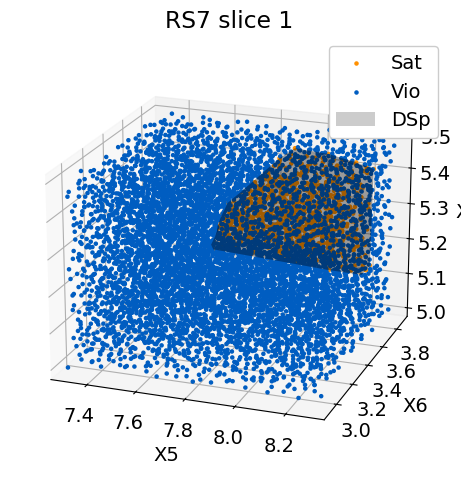

['X1', 'X6', 'X7']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |       False        |         0          |     2.500e+00      
    2     |     3.750e+00      |       False        |         0          |     1.250e+00      
    3     |     4.375e+00      |       False        |         0          |     6.250e-01      
    4     |     4.688e+00      |       False        |         0          |     3.125e-01      
    5     |     4.844e+00      |       False        |         0          |     1.562e-01      
    6     |     4.922e+00      |       False        |         0          | 

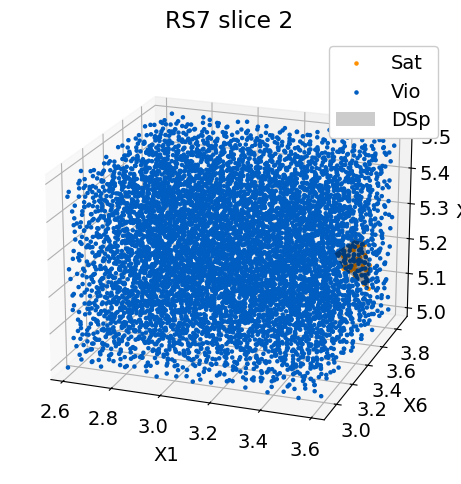

['X1', 'X2', 'X7']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |       False        |         0          |     2.500e+00      
    2     |     3.750e+00      |       False        |         0          |     1.250e+00      
    3     |     4.375e+00      |       False        |         0          |     6.250e-01      
    4     |     4.688e+00      |       False        |         0          |     3.125e-01      
    5     |     4.844e+00      |       False        |         0          |     1.562e-01      
    6     |     4.922e+00      |       False        |         0          | 

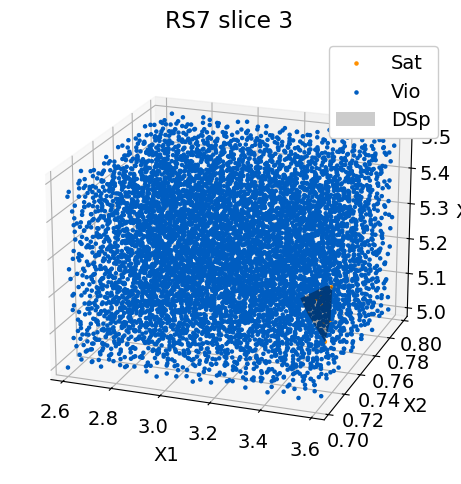

['X1', 'X2', 'X3']
No samples satisfied all constraints.
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________


ValueError: No points given

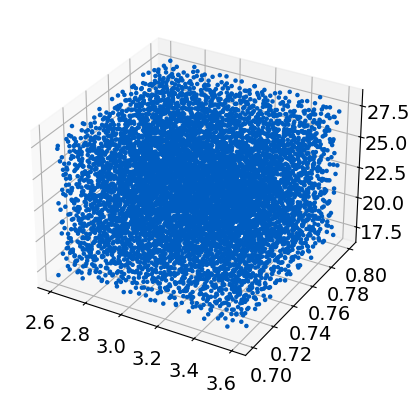

In [85]:
#plotting the results
benchmark_sol_7DGP = load_pkl('benchmark_sol_7DGP.pkl')

for problem_label in ['RS7']:
    for no_slice in range(len(list(benchmark_sol_7DGP[problem_label].keys()))):
        opt_hidedsp = {'hidedsp': False, 'hidevio': False}
        ds = benchmark_sol_7DGP[problem_label][no_slice]
        sv = ds.df['sv_cut'].iloc[0]
        print(sv)
        ds.plot(sv, opt = opt_hidedsp)
        plt.title(problem_label + ' slice ' + str(no_slice+1))
        plt.show()